## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=64, activation='relu')(input_layer)
    out = keras.layers.Dense(units=10, activation='softmax')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [7]:
"""
Compile 模型
"""
# optimizer = keras.optimizers.Adam(lr=0.001)
optimizer =  keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

W0716 10:46:10.739303   104 deprecation_wrapper.py:119] From c:\users\user\anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0716 10:46:10.835998   104 deprecation_wrapper.py:119] From c:\users\user\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0716 10:46:15.725573   104 deprecation.py:323] From c:\users\user\anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0716 10:46:15.789635   104 deprecation_wrapper.py:119] From c:\users\user\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.8958 - acc: 0.3283 - val_loss: 1.8009 - val_acc: 0.3684
Epoch 2/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.7159 - acc: 0.3961 - val_loss: 1.6795 - val_acc: 0.4155
Epoch 3/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.6399 - acc: 0.4253 - val_loss: 1.6531 - val_acc: 0.4179
Epoch 4/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.5925 - acc: 0.4424 - val_loss: 1.6481 - val_acc: 0.4208
Epoch 5/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.5568 - acc: 0.4548 - val_loss: 1.5869 - val_acc: 0.4410
Epoch 6/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.5300 - acc: 0.4633 - val_loss: 1.5454 - val_acc: 0.4567
Epoch 7/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.5025 - acc: 0.4717 - val_loss: 1.5852 -

50000/50000 [==============================] - 3s 64us/step - loss: 1.1737 - acc: 0.5885 - val_loss: 1.4625 - val_acc: 0.4996
Epoch 60/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.1740 - acc: 0.5870 - val_loss: 1.4594 - val_acc: 0.4924
Epoch 61/500
50000/50000 [==============================] - 3s 61us/step - loss: 1.1662 - acc: 0.5900 - val_loss: 1.5437 - val_acc: 0.4707
Epoch 62/500
50000/50000 [==============================] - 3s 61us/step - loss: 1.1634 - acc: 0.5896 - val_loss: 1.5042 - val_acc: 0.4803
Epoch 63/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.1610 - acc: 0.5932 - val_loss: 1.5235 - val_acc: 0.4813
Epoch 64/500
50000/50000 [==============================] - 3s 61us/step - loss: 1.1556 - acc: 0.5951 - val_loss: 1.5678 - val_acc: 0.4718
Epoch 65/500
50000/50000 [==============================] - 3s 61us/step - loss: 1.1559 - acc: 0.5960 - val_loss: 1.5252 - val_acc: 0.4801
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.0176 - acc: 0.6429 - val_loss: 1.6174 - val_acc: 0.4794
Epoch 119/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.0178 - acc: 0.6420 - val_loss: 1.7130 - val_acc: 0.4587
Epoch 120/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.0179 - acc: 0.6410 - val_loss: 1.6389 - val_acc: 0.4625
Epoch 121/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.0155 - acc: 0.6429 - val_loss: 1.6343 - val_acc: 0.4709
Epoch 122/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.0196 - acc: 0.6392 - val_loss: 1.6107 - val_acc: 0.4701
Epoch 123/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.0078 - acc: 0.6469 - val_loss: 1.6043 - val_acc: 0.4847
Epoch 124/500
50000/50000 [==============================] - 4s 79us/step - loss: 1.0134 - acc: 0.6431 - val_loss: 1.5971 - val_acc: 0.4778
Epoch 125/500
50000/

50000/50000 [==============================] - 3s 63us/step - loss: 0.9100 - acc: 0.6784 - val_loss: 1.7842 - val_acc: 0.4606
Epoch 177/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.9194 - acc: 0.6773 - val_loss: 1.7556 - val_acc: 0.4649
Epoch 178/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.9097 - acc: 0.6812 - val_loss: 1.8028 - val_acc: 0.4567
Epoch 179/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.9110 - acc: 0.6791 - val_loss: 1.8239 - val_acc: 0.4479
Epoch 180/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.9109 - acc: 0.6803 - val_loss: 1.7596 - val_acc: 0.4714
Epoch 181/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.8996 - acc: 0.6841 - val_loss: 1.8147 - val_acc: 0.4703
Epoch 182/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.9073 - acc: 0.6813 - val_loss: 1.7304 - val_acc: 0.4781
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 3s 65us/step - loss: 0.8236 - acc: 0.7100 - val_loss: 1.8473 - val_acc: 0.4669
Epoch 235/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.8213 - acc: 0.7132 - val_loss: 1.8988 - val_acc: 0.4648
Epoch 236/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.8243 - acc: 0.7095 - val_loss: 1.8590 - val_acc: 0.4650
Epoch 237/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.8219 - acc: 0.7110 - val_loss: 1.8582 - val_acc: 0.4673
Epoch 238/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.8253 - acc: 0.7108 - val_loss: 1.8822 - val_acc: 0.4633
Epoch 239/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.8236 - acc: 0.7110 - val_loss: 1.8813 - val_acc: 0.4595
Epoch 240/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.8201 - acc: 0.7133 - val_loss: 1.9061 - val_acc: 0.4550
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 4s 72us/step - loss: 0.7643 - acc: 0.7322 - val_loss: 1.9532 - val_acc: 0.4657
Epoch 293/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.7563 - acc: 0.7333 - val_loss: 1.9569 - val_acc: 0.4633
Epoch 294/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.7609 - acc: 0.7331 - val_loss: 2.1894 - val_acc: 0.4454
Epoch 295/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.7607 - acc: 0.7320 - val_loss: 1.9814 - val_acc: 0.4625
Epoch 296/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.7504 - acc: 0.7376 - val_loss: 1.9561 - val_acc: 0.4623
Epoch 297/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.7580 - acc: 0.7335 - val_loss: 1.9633 - val_acc: 0.4688
Epoch 298/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.7501 - acc: 0.7378 - val_loss: 2.0384 - val_acc: 0.4576
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 3s 61us/step - loss: 0.7088 - acc: 0.7494 - val_loss: 2.2610 - val_acc: 0.4399
Epoch 351/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.7189 - acc: 0.7488 - val_loss: 2.2873 - val_acc: 0.4401
Epoch 352/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.6958 - acc: 0.7576 - val_loss: 2.1736 - val_acc: 0.4484
Epoch 353/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.6922 - acc: 0.7592 - val_loss: 2.1557 - val_acc: 0.4539
Epoch 354/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.6933 - acc: 0.7571 - val_loss: 2.2188 - val_acc: 0.4536
Epoch 355/500
50000/50000 [==============================] - 3s 70us/step - loss: 0.6941 - acc: 0.7581 - val_loss: 2.1347 - val_acc: 0.4557
Epoch 356/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.7072 - acc: 0.7519 - val_loss: 2.3227 - val_acc: 0.4367
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 3s 63us/step - loss: 0.6561 - acc: 0.7718 - val_loss: 2.3311 - val_acc: 0.4359
Epoch 409/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.6474 - acc: 0.7750 - val_loss: 2.3010 - val_acc: 0.4484
Epoch 410/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.6441 - acc: 0.7756 - val_loss: 2.5740 - val_acc: 0.4248
Epoch 411/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.6420 - acc: 0.7756 - val_loss: 2.3352 - val_acc: 0.4472
Epoch 412/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.6507 - acc: 0.7728 - val_loss: 2.3385 - val_acc: 0.4554
Epoch 413/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.6450 - acc: 0.7751 - val_loss: 2.2360 - val_acc: 0.4581
Epoch 414/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.6361 - acc: 0.7770 - val_loss: 2.3483 - val_acc: 0.4525
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 4s 73us/step - loss: 0.5929 - acc: 0.7944 - val_loss: 2.6181 - val_acc: 0.4321
Epoch 467/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.6037 - acc: 0.7888 - val_loss: 2.4904 - val_acc: 0.4476
Epoch 468/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.6083 - acc: 0.7873 - val_loss: 2.6921 - val_acc: 0.4253
Epoch 469/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.6056 - acc: 0.7886 - val_loss: 2.4071 - val_acc: 0.4456
Epoch 470/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.6062 - acc: 0.7887 - val_loss: 2.4137 - val_acc: 0.4541
Epoch 471/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.5964 - acc: 0.7925 - val_loss: 2.7390 - val_acc: 0.4187
Epoch 472/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.6044 - acc: 0.7888 - val_loss: 2.5901 - val_acc: 0.4390
Epoch 473/500
50000/50000 [=======

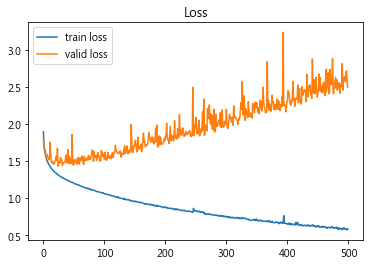

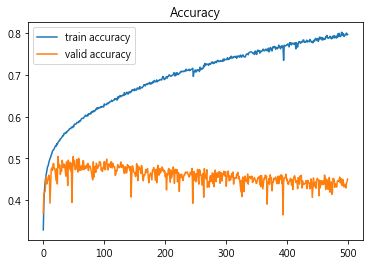

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()